The following code studies the convergence of the CIV acquisition function and can be used to replicate **Fig. 4**.

In [1]:
from argparse import Namespace
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

from optint.data import synthetic_instance
from optint.run import run

### Fig. 4A

In [2]:
p = 10
sigma_square = np.ones(p)
DAG_type = 'random'

problem = synthetic_instance(nnodes=p, sigma_square=sigma_square, a_size=5, DAG_type=DAG_type, std=True)

{0: Text(1.0, 1.4702742047251475e-08, '$x_1$'),
 1: Text(0.8090170037208972, 0.5877852551873061, '$x_2$'),
 2: Text(0.30901697689880736, 0.9510565490463628, '$x_3$'),
 3: Text(-0.30901702458252295, 0.9510564894417184, '$x_4$'),
 4: Text(-0.8090169917999684, 0.5877852551873061, '$x_5$'),
 5: Text(-0.999999988079071, -7.272003400514403e-08, '$x_6$'),
 6: Text(-0.809016932195324, -0.5877852853864663, '$x_7$'),
 7: Text(-0.30901711398948956, -0.9510564600362343, '$x_8$'),
 8: Text(0.3090171259104184, -0.9510564600362343, '$x_9$'),
 9: Text(0.8090169441162529, -0.5877852853864663, '$x_{10}$')}

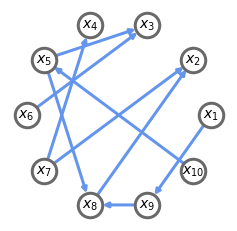

In [3]:
import networkx as nx
d = nx.DiGraph()
d.add_nodes_from(list(range(p)))
for (i, j) in problem.DAG.arcs:
	d.add_edge(i, j)
color_d = []
for i,j in d.edges:
	color_d.append(abs(problem.B.T[i,j]))
dict_l = {node: r'$x_{}$'.format(str(node+1)) for node in range(p-1)}
dict_l[9] = r'$x_{10}$' 
nw_ax = plt.subplot2grid((4, 4), (0, 0), colspan=12, rowspan=12)
plt.gcf().set_size_inches(4, 4)
pos = nx.circular_layout(d)
nx.draw(d, pos=pos, node_color='w', ax=nw_ax, edge_cmap=plt.cm.Blues, edge_vmin=0, edge_vmax=1, edge_color='cornflowerblue', edgecolors='dimgrey', linewidths=3, width=3, node_size=600, font_size=15)
nx.draw_networkx_labels(d, pos, labels=dict_l, ax=nw_ax, font_size=14)
# plt.savefig('figures/dag.pdf')


### Fig. 4B

In [4]:
# options for testing
opts = Namespace(n=1, T=50, W=0, R=20, time=False)

opts.active = True
opts.known_noise = True
opts.acq = 'civ'
opts.measure = 'unif'
A_ivr_sphere, Prob_ivr_sphere = run(problem, opts)

100%|██████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:11<00:00,  1.71it/s]


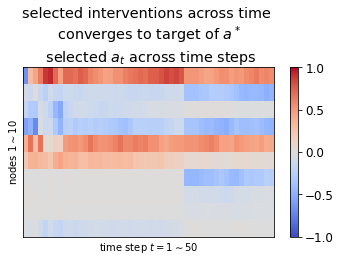

In [5]:
fig, ax = plt.subplots(1,1,figsize=(5,3.8))
plt.rc('font', size=12)

im = ax.imshow(np.concatenate(A_ivr_sphere[0], axis=1)[::-1], extent=[0,50,0,10], aspect='auto', norm=None, cmap='coolwarm', vmin=-1, vmax=1)
plt.xlabel(r'time step $t = 1 \sim 50$')
plt.ylabel(r'nodes $1\sim {10}$')
plt.title('selected interventions across time \n converges to target of $a^*$ \n selected $a_t$ across time steps')
cbar = plt.colorbar(im,ticks=[-1, -0.5, 0, 0.5, 1])
ax.set_xticks([])
ax.set_yticks([])

plt.tight_layout()
# plt.savefig('figure/heatmap1.pdf')

Text(0.5, 1.0, '$a^*$')

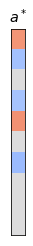

In [6]:
fig, ax = plt.subplots(1,1,figsize=(0.25,3.8))
plt.rc('font', size=12)

ax.imshow(problem.a_target[::-1], norm=None,  extent=[0,1,0,10], aspect='auto', cmap='coolwarm',vmin=-1, vmax=1)
ax.set_yticks([])
ax.set_xticks([])
plt.title(r'$a^*$')
# plt.savefig('figure/heatmap2.pdf')